# Hybrid Recommender System

A recommender system, or a recommendation system, can be thought of as a subclass of information filtering system that seeks to predict the best “rating” or “preference” a user would give to an item which is typically obtained by optimizing for objectives like total clicks, total revenue, and overall sales.

Broadly speaking, most recommender systems leverage two types of data:
* Interaction Data, such as ratings, and browsing behaviors, and
* Attribution Information, about each user and items

The modeling approach relying on the former data is generally known Collaborative Filtering method, and the approach using the latter is referred to as the Content-Base Filtering method. There is also another category known as Knowledge-Based recommender system that is based on explicitly specified user requirements.
Of course, each of these methods has its strengths and weaknesses depending on which applications they are used for, and the amount of data available.
Hybrid Systems are then used to combined the advantages of these approaches to have a robust performing system across a wide variety of applications.


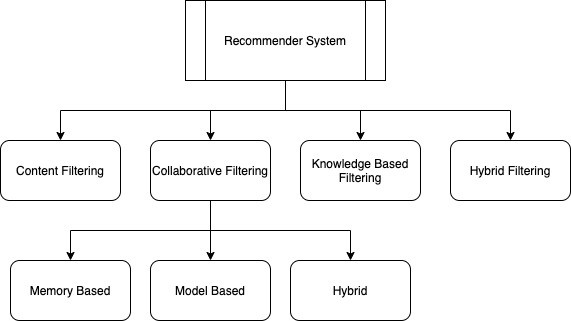


* **Collaborative Filtering Methods:** 

These types of models use the collaborative power of the ratings provided by multiple users to make recommendations and rely mostly on leveraging either inter-item correlations or inter-user interactions for the prediction process. Intuitively, it relies on an underlying notion that two users who rate items similarly are likely to have comparable preferences for other items.

There are two types of methods that are commonly used in collaborative filtering:

**Memory-based** methods also referred to as neighborhood-based collaborative filtering algorithms, where ratings of user-item combinations are predicted based on their neighborhoods. These neighborhoods can be further defined as (1) User Based, and (2) Item Based.

In **Model-based** methods, ML techniques are used to learn model parameters within the context of a given optimization framework

* **Content Based Filtering Methods:**

In these types of systems, the descriptive attributes of items/users are used to make recommendations. The term “content” refers to these descriptions. In content-based methods, the ratings and interaction behavior of users are combined with the content information available in the items.

* **Hybrid Methods:** 

In many cases, a wider variety of inputs is available; in such cases, many opportunities exist for hybridization, where the various aspects from different types of systems are combined to achieve the best of all worlds. The approach is comparable to the conventional ensemble analysis approach, where the power of multiple types of machine learning algorithms is combined to create a more robust model.

# What Is Collaborative Filtering?

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions. There are many ways to decide which users are similar and combine their choices to create a list of recommendations. 


**Item-Based Collaborative Filtering** is the recommendation system to use the similarity between items using the ratings by users. 

**User-Based Collaborative Filtering** is a technique used to predict the items that a user might like on the basis of ratings given to that item by the other users who have similar taste with that of the target user. Many websites use collaborative filtering for building their recommendation system.

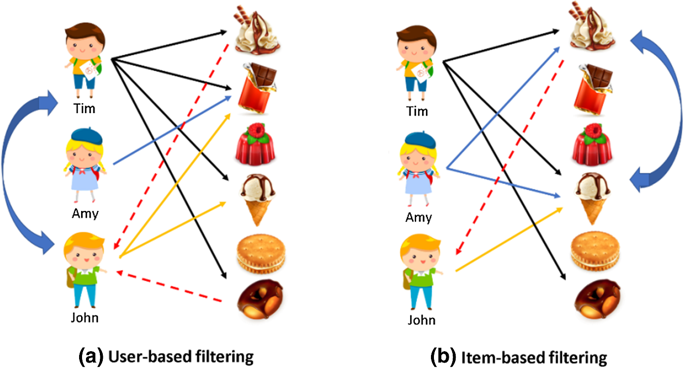



# Business Problem

Estimate using the item-based and user-based recommender methods for the user whose ID is given.

# Dataset and Story

MovieLens, a movie recommendation service, provided the dataset. It contains the rating scores for these movies along with the movies.

It contains 2,000,0263 ratings across 27,278 movies. This data was created by 138,493 users between 09 January 1995 and 31 March 2015. This data set was created on October 17, 2016. Users are randomly selected. It is known that all selected users voted for at least 20 movies.

**Variables of the data set:**

**movie.csv**
- movieId – Unique movie number. (UniqueID) 
- title – Movie name

**rating.csv**
* userid – Unique user number. (UniqueID) 
* movieId – Unique movie number. (UniqueID) 
* rating – The rating given to the movie by the user
* timestamp – Evaluation date

# Load Dataset


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-20m-dataset/rating.csv
/kaggle/input/movielens-20m-dataset/link.csv
/kaggle/input/movielens-20m-dataset/genome_tags.csv
/kaggle/input/movielens-20m-dataset/genome_scores.csv
/kaggle/input/movielens-20m-dataset/tag.csv
/kaggle/input/movielens-20m-dataset/movie.csv


In [2]:
import pandas as pd
pd.set_option('display.max_columns', 20)
movie = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")
rating = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")

df = movie.merge(rating, how="left", on="movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


In [3]:
df.shape

(20000797, 6)

# Let's Start!

In [4]:
# Let's find the unique movies:
df["title"].nunique()

27262

In [5]:
#Let's see how many comments were made on which movie:
df["title"].value_counts().head()

Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: title, dtype: int64

In [6]:
# Let's get to the movies with less than 1000 reviews:
comment_counts = pd.DataFrame(df["title"].value_counts())
rare_movies = comment_counts[comment_counts["title"] <= 1000].index

# Let's get access to movies with over 1000 reviews:
common_movies = df[~df["title"].isin(rare_movies)]
common_movies.shape

(17766015, 6)

In [7]:
# Unique movies with more than 1000 reviews:
common_movies["title"].nunique()

3159

In [8]:
# Let's create the User Movie Df:
user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")

# There are 3159 movies that 138493 users have voted for. 
user_movie_df.shape

(138493, 3159)

In [9]:
user_movie_df.head(10)

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),...,Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zulu (1964),[REC] (2007),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# item-based movie recommendation example:
movie_name = "Matrix, The (1999)"
movie_name = user_movie_df[movie_name]
user_movie_df.corrwith(movie_name).sort_values(ascending=False).head(10)

title
Matrix, The (1999)                                           1.000000
Matrix Reloaded, The (2003)                                  0.516906
Matrix Revolutions, The (2003)                               0.449588
Animatrix, The (2003)                                        0.367151
Blade (1998)                                                 0.334493
Terminator 2: Judgment Day (1991)                            0.333882
Minority Report (2002)                                       0.332434
Edge of Tomorrow (2014)                                      0.326762
Mission: Impossible (1996)                                   0.320815
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.318726
dtype: float64

In [11]:
# Let's determine the movies that the user watched.

# Let's choose random user:
# random_user = int(pd.Series(user_movie_df.index).sample(1, random_state=45).values)
random_user = 28491

In [12]:
# Let's reduce the #dataset to user 28491:
random_user_df = user_movie_df[user_movie_df.index == random_user]
random_user_df

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),...,Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zulu (1964),[REC] (2007),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
28491.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Let's choose non-NaN. Movies watched by all 28491:
movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()
movies_watched

['28 Days (2000)',
 'Blade Runner (1982)',
 'Braveheart (1995)',
 'Carrie (1976)',
 'Deliverance (1972)',
 'Escape from the Planet of the Apes (1971)',
 'Fight Club (1999)',
 'Gladiator (2000)',
 'Hancock (2008)',
 'Highlander III: The Sorcerer (a.k.a. Highlander: The Final Dimension) (1994)',
 'Iron Man (2008)',
 'King Kong (2005)',
 'Lethal Weapon 4 (1998)',
 'Money Train (1995)',
 'Poltergeist (1982)',
 'Shawshank Redemption, The (1994)',
 'Spice World (1997)',
 'Star Trek V: The Final Frontier (1989)',
 'Star Trek: Insurrection (1998)',
 'Westworld (1973)',
 "White Men Can't Jump (1992)",
 'Young Guns (1988)']

In [14]:
#let's verify:
user_movie_df.loc[user_movie_df.index == random_user, user_movie_df.columns == "Young Guns (1988)"]
# gave this movie a 3.0 rating.

title,Young Guns (1988)
userId,
28491.0,3.0


In [15]:
# How many movies have user #28491 watched:
len(movies_watched)

22

In [16]:
# we have reduced the dataset based on movies watched by user 28491:
movies_watched_df = user_movie_df[movies_watched]
movies_watched_df.head()
movies_watched_df.shape

(138493, 22)

In [17]:
# information on how many movies each user watched in total:
user_movie_count = movies_watched_df.T.notnull().sum()

user_movie_count = user_movie_count.reset_index()
user_movie_count.columns = ["userId","movie_count"]
user_movie_count.head()

,userId,movie_count
0,1.0,4
1,2.0,3
2,3.0,5
3,4.0,0
4,5.0,2


In [18]:
# 3 user watched 22 movies:
user_movie_count[user_movie_count["movie_count"] == 22].count()

userId         3
movie_count    3
dtype: int64

In [19]:
# 60% of movies watched by 28491:
perc = len(movies_watched) * 60 / 100
perc

13.2

In [20]:
# People who have watched more than 60% movies together with 28491 users:
users_same_movies = user_movie_count[user_movie_count["movie_count"] > perc]["userId"]
users_same_movies.count()

723

In [21]:
# Let's combine the data of user #28491 and similar users:
final_df = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies)],
                      random_user_df[movies_watched]])

final_df.shape
final_df.T.corr()

userId,156.0,298.0,768.0,775.0,812.0,903.0,971.0,982.0,1516.0,1849.0,...,136806.0,136875.0,137037.0,137202.0,137343.0,137686.0,137885.0,138134.0,138208.0,28491.0
userId,,,,,,,,,,,,,,,,,,,,,
156.0,1.000000,0.768998,0.518563,0.509571,0.406438,0.580881,0.746061,0.564671,0.760992,0.452328,...,0.231630,0.534560,0.705608,0.289858,0.489090,0.923310,0.809843,0.383278,0.515122,0.534434
298.0,0.768998,1.000000,0.494077,0.671367,0.449945,0.681788,0.612133,0.692902,0.791030,0.580531,...,0.528925,0.769683,0.896963,0.384900,0.543919,0.752742,0.660895,0.353248,0.665225,0.681345
768.0,0.518563,0.494077,1.000000,0.517099,0.393692,0.538754,0.561707,0.590536,0.606786,0.412043,...,0.644874,0.705789,0.631283,0.437588,0.256773,0.444187,0.623648,0.466817,0.262072,0.700749
775.0,0.509571,0.671367,0.517099,1.000000,-0.121151,0.559295,0.528027,0.570422,0.465163,0.660543,...,0.676971,0.198899,0.706739,0.571706,0.174144,0.644313,0.701843,0.534395,0.266122,0.313870
812.0,0.406438,0.449945,0.393692,-0.121151,1.000000,0.486398,0.516995,0.421158,0.339938,-0.122608,...,-0.150079,0.407864,0.478719,0.047782,0.309242,0.439956,0.364421,-0.438957,0.378231,0.219947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137686.0,0.923310,0.752742,0.444187,0.644313,0.439956,0.818724,0.715936,0.661438,0.688119,0.784257,...,0.328167,0.508406,0.760413,0.544165,0.519028,1.000000,0.795444,0.435016,0.734423,0.395573
137885.0,0.809843,0.660895,0.623648,0.701843,0.364421,0.742307,0.709293,0.708238,0.883455,0.646443,...,0.459424,0.405298,0.749775,0.632522,0.549091,0.795444,1.000000,0.349731,0.439163,0.572888
138134.0,0.383278,0.353248,0.466817,0.534395,-0.438957,0.531844,0.337219,0.353774,0.247008,0.890524,...,0.336349,0.350716,0.575853,0.203398,0.178862,0.435016,0.349731,1.000000,0.354943,0.239835


In [22]:
#corr for all users:
corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
corr_df.head()

,user_id_1,user_id_2,corr
0,98213.0,3664.0,-0.947998
1,98213.0,68575.0,-0.930482
2,98213.0,39382.0,-0.923228
3,125010.0,96859.0,-0.917663
4,130491.0,125010.0,-0.891902


In [23]:
# Users with a correlation of %65 or more with 28491 users:
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= 0.65)][
    ["user_id_2", "corr"]].reset_index(drop=True)

top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"user_id_2": "userId"}, inplace=True)
top_users.head()

,userId,corr
74,9116.0,0.889251
73,7370.0,0.862414
72,126909.0,0.844482
71,68575.0,0.833011
70,62599.0,0.822171


In [24]:
# let's see the ratings of users:
rating = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")
top_users_ratings = top_users.merge(rating[["userId", "movieId", "rating"]], how='inner')

top_users_ratings = top_users_ratings[top_users_ratings["userId"] != random_user]
top_users_ratings.head()

,userId,corr,movieId,rating
0,9116.0,0.889251,1,4.0
1,9116.0,0.889251,2,4.0
2,9116.0,0.889251,4,3.0
3,9116.0,0.889251,5,4.0
4,9116.0,0.889251,9,2.0


In [25]:
# Calculate the Weighted Average Recommendation Score and keep the first 5 movies.

#Let's do a single score with the most similar by corr * rating:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})

recommendation_df = top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df.head()

,movieId,weighted_rating
0,1,2.865044
1,2,2.012408
2,3,1.958197
3,4,1.651389
4,5,1.703669


In [26]:
# weighted rating greater than 4:
recommendation_df[recommendation_df["weighted_rating"] > 3.7]

# Movies 28491 will like:
movies_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 3.7].sort_values("weighted_rating", ascending=False)

movies_to_be_recommend.merge(movie[["movieId", "title"]])

#Let's see the top 5 movies:
movies_to_be_recommend.merge(movie[["movieId", "title"]])[:5]

,movieId,weighted_rating,title
0,1151,4.222411,Faust (1994)
1,97328,3.848473,Liberal Arts (2012)
2,104944,3.848473,Short Term 12 (2013)
3,50742,3.748548,7 Plus Seven (1970)
4,97673,3.748548,56 Up (2012)


In [27]:
# Make an item-based suggestion based on the name of the movie that the user has watched with the highest score.

# ▪ 5 suggestions user-based
# ▪ 5 suggestions item-based

movie = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")
rating = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")

# The last highly-rated movie by user 108170:

user = 108170
movie_id = rating[(rating["userId"] == user) & (rating["rating"] == 5.0)].sort_values(by="timestamp", ascending=False)["movieId"][0:1].values[0]
movie_id

7044

In [28]:
# ▪ 5 suggestions user-based
movies_to_be_recommend.merge(movie[["movieId", "title"]])[:5]['title'].to_list()

['Faust (1994)',
 'Liberal Arts (2012)',
 'Short Term 12 (2013)',
 '7 Plus Seven (1970)',
 '56 Up (2012)']

In [29]:
# ▪ 5 suggestions item-based
movie_name = movie[movie['movieId'] == movie_id]['title'].values[0]
movie_name = user_movie_df[movie_name]
moveis_from_item_based = user_movie_df.corrwith(movie_name).sort_values(ascending=False)
moveis_from_item_based[1:6].index.to_list()

['My Science Project (1985)',
 'Mediterraneo (1991)',
 'Old Man and the Sea, The (1958)',
 "National Lampoon's Senior Trip (1995)",
 'Clockwatchers (1997)']